In [ ]:
#自然言語処理　Morphological Analysis Engine　形態素解析エンジン　Mecab
!pip install mecab-python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install unidic-lite


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=014564c58ffee6e83ed1283995d9f61a0c958587d80ef57a23b97aadb1d407e6
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import MeCab

mecab_tagger = MeCab.Tagger()
text = '''機械学習（きかいがくしゅう、英: machine learning）とは、経験からの学習により自動で改善するコンピューターアルゴリズムもしくはその研究領域で[1][2]、人工知能の一種であるとみなされている。典型的には「訓練データ」もしくは「学習データ」と呼ばれるデータを使って学習し、学習結果を使って何らかのタスクをこなすものとされる。例えば過去のスパムメールを訓練データとして用いて学習し、スパムフィルタリングというタスクをこなす、といったものである。'''

node = mecab_tagger.parseToNode(text)
count_dict = {}
#nodeは、品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音などの情報がCSVカンマ区切りのテキスト
#whileで単語の名詞が出現するごとにカウント
while node:
    word = node.surface
    hinshi = node.feature.split(",")[0]
    #split(",")で分割して、初めの品詞情報を取得
    if word in count_dict.keys() and hinshi == "名詞":
        count_dict[word] += 1
    elif hinshi == "名詞":
        count_dict[word] = 1
    else:
        pass
    node = node.next

word_counts = sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
word_counts


[('学習', 6),
 ('データ', 4),
 ('訓練', 2),
 ('タスク', 2),
 ('もの', 2),
 ('スパム', 2),
 ('機械', 1),
 ('きかい', 1),
 ('がくしゅう', 1),
 ('英', 1),
 ('machine', 1),
 ('learning', 1),
 ('経験', 1),
 ('自動', 1),
 ('改善', 1),
 ('コンピューター', 1),
 ('アルゴリズム', 1),
 ('研究', 1),
 ('領域', 1),
 ('1', 1),
 ('2', 1),
 ('人工', 1),
 ('知能', 1),
 ('一種', 1),
 ('典型', 1),
 ('結果', 1),
 ('過去', 1),
 ('メール', 1),
 ('フィルタリング', 1)]

In [ ]:
import re
import MeCab

mecab_tagger = MeCab.Tagger()
text = '''機械学習（きかいがくしゅう、英: machine learning）とは、経験からの学習により自動で改善するコンピューターアルゴリズムもしくはその研究領域で[1][2]、人工知能の一種であるとみなされている。典型的には「訓練データ」もしくは「学習データ」と呼ばれるデータを使って学習し、学習結果を使って何らかのタスクをこなすものとされる。例えば過去のスパムメールを訓練データとして用いて学習し、スパムフィルタリングというタスクをこなす、といったものである。'''

node = mecab_tagger.parseToNode(text)
vocab_list = []

while node:
    word = node.surface
    hinshi = node.feature.split(",")[0]
    if hinshi == "名詞":
        if (not word.isnumeric()) and (not re.match(r'^[\u3040-\u309F]+$', word)):
            # 名詞が数値、平仮名だけの場合は除き、それ以外の名詞を保存する
            vocab_list.append(word)
    else:
        pass
    node = node.next

print(vocab_list)

['機械', '学習', '英', 'machine', 'learning', '経験', '学習', '自動', '改善', 'コンピューター', 'アルゴリズム', '研究', '領域', '人工', '知能', '一種', '典型', '訓練', 'データ', '学習', 'データ', 'データ', '学習', '学習', '結果', 'タスク', '過去', 'スパム', 'メール', '訓練', 'データ', '学習', 'スパム', 'フィルタリング', 'タスク']


In [ ]:
#取得した形態素解析したデータのTF-IDF値を求める
#Term Frequency-Inverse Document Frequency
#TF-IDFは、TFとIDFの積。TF-IDFが大きい単語ほど、文書内での重要度が高く、また文書全体における希少性が高いと評価できる

from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idfモデルの作成と学習
tfidf_model = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', norm=None)
tfidf_model.fit(vocab_list)


TfidfVectorizer(norm=None, token_pattern='(?u)\\b\\w+\\b')

In [ ]:
# 対象のテキストをtf-idf値に変換
vocab_text = " ".join(vocab_list)
tfidf_vec = tfidf_model.transform([vocab_text]).toarray()[0]
# 単語: tf-idf値となるdictに変換
tfidf_dict = dict(zip(tfidf_model.get_feature_names_out(), tfidf_vec))
# tf-idf値が正のみの単語を残す
tfidf_dict = {word: num_val for word, num_val in tfidf_dict.items() if num_val > 0}

tfidf_dict


{'learning': 3.8903717578961645,
 'machine': 3.8903717578961645,
 'アルゴリズム': 3.8903717578961645,
 'コンピューター': 3.8903717578961645,
 'スパム': 6.969813299576001,
 'タスク': 6.969813299576001,
 'データ': 11.896324104088038,
 'フィルタリング': 3.8903717578961645,
 'メール': 3.8903717578961645,
 '一種': 3.8903717578961645,
 '人工': 3.8903717578961645,
 '典型': 3.8903717578961645,
 '学習': 15.825652736404779,
 '改善': 3.8903717578961645,
 '機械': 3.8903717578961645,
 '知能': 3.8903717578961645,
 '研究': 3.8903717578961645,
 '経験': 3.8903717578961645,
 '結果': 3.8903717578961645,
 '自動': 3.8903717578961645,
 '英': 3.8903717578961645,
 '訓練': 6.969813299576001,
 '過去': 3.8903717578961645,
 '領域': 3.8903717578961645}

In [ ]:
#結果をもとにワードクラウドを使って視覚化
!pip install wordcloud
!pip install matplotlib


In [ ]:
!apt-get -y install fonts-ipafont-gothic
#日本語フォント用インストール

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (16.6 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

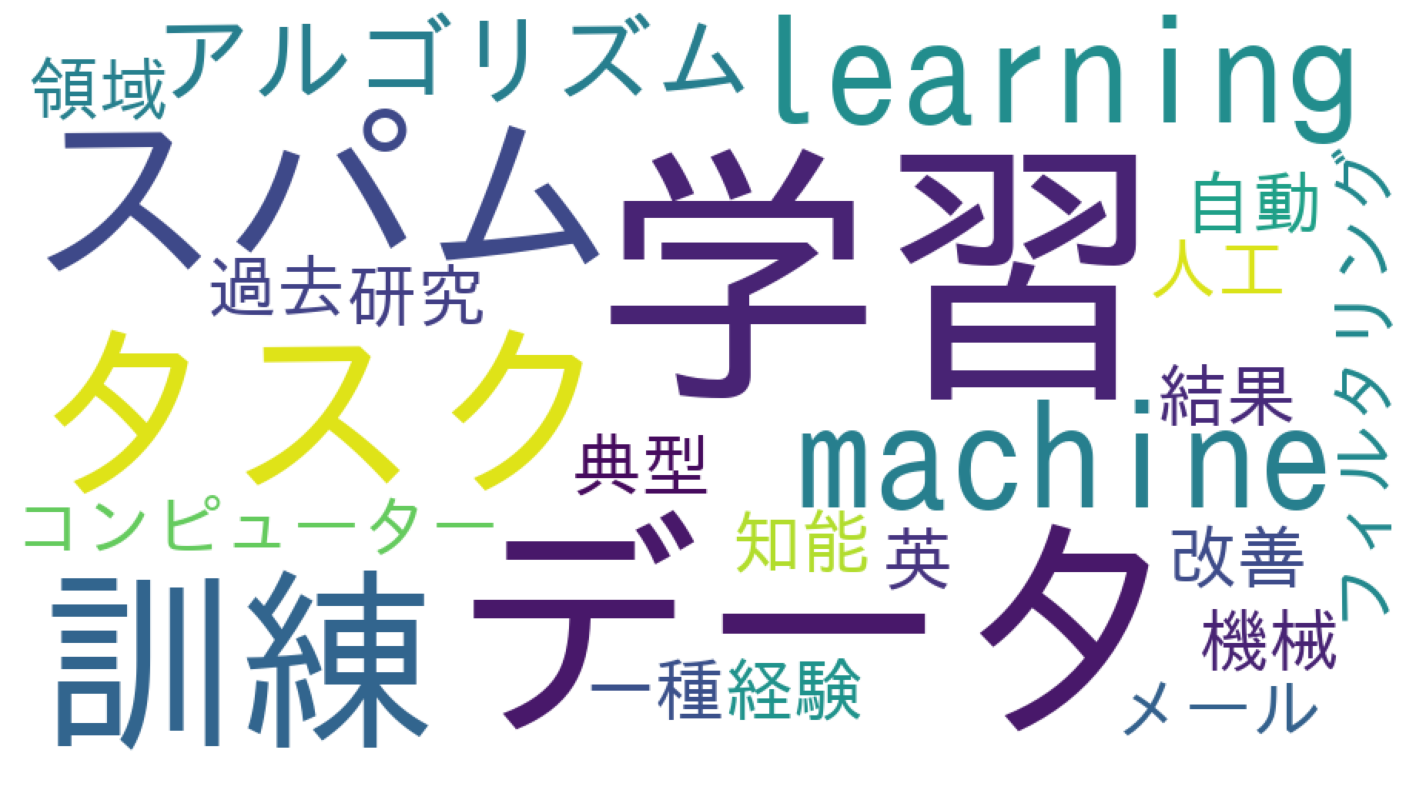

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
wc = WordCloud(background_color="white",width=900, height=500, font_path=font_path).generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(wc)
#TF-IDF値で比較するので、generate_from_frequenciesというメソッド